In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import random

In [ ]:
# Reading the dataset
# 2 modes: 'file' or 'folder'
def read_images(dataset_path,mode, batch_size):
    data = []
    imagepaths, labels = list(), list()
    if mode == 'file':
        # Read dataset file
        data = open(dataset_path, 'r').read().splitlines()
        for d in data:
            imagepaths.append(d.split(' ')[0])
            labels.append(int(d.split(' ')[1]))
    elif mode == 'folder':
        # An ID will be affected to each sub-folders by alphabetical order
        label = 0
        # List the directory
        try:  # Python 2
            classes = sorted(os.walk(dataset_path).next()[1])
        except Exception:  # Python 3
            classes = sorted(os.walk(dataset_path).__next__()[1])
        # List each sub-directory (the classes)
        for c in classes:
            c_dir = os.path.join(dataset_path, c)
            try:  # Python 2
                walk = os.walk(c_dir).next()
            except Exception:  # Python 3
                walk = os.walk(c_dir).__next__()
            # Add each image to the training set
            for sample in walk[2]:
                # Only keeps jpeg images
                if sample.endswith('.jpg') or sample.endswith('.jpeg'):
                    imagepaths.append(os.path.join(c_dir, sample))
                    labels.append(label)
            label += 1
    else:
        raise Exception("Unknown mode.")

    for img,lab_ in zip(imagepaths,labels):
      array = cv.imread(img)
      if array.shape==(480,640,3):
        data.append((array, lab_))
        print("*",end='')
    
    return data


learning_rate = 0.001
num_steps = 10000
batch_size = 128
display_step = 100

# Network Parameters
dropout = 0.75 # Dropout, probability to keep units

DATASET_PATH = '/content/gdrive/My Drive/dataset'
MODE = 'folder'
batch_size  = 32
# Build the data input
dataset = read_images(DATASET_PATH, MODE, batch_size)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [ ]:
test = dataset[500]

cv2_imshow(test[0])
print(test[1])

In [ ]:
with open('/content/gdrive/My Drive/dataset/test.npy', 'wb') as f:
    np.save(f, dataset)


In [ ]:
print(dataset[1][0])

In [ ]:
dataset = np.load('/content/gdrive/My Drive/dataset/test.npy',allow_pickle=True)


In [ ]:
dataset = dataset/np.array([255.0,1])
dataset = dataset.tolist()

In [ ]:
dataset[110]

In [ ]:
def split_data_label(in_list):
  data = []
  label = []

  for item in in_list:
    data.append(np.array(item[0], dtype='float32'))
    label.append(item[1])
  
  return np.array(data), np.array(label)


In [ ]:
import copy 

dataset_copy = copy.deepcopy(dataset)
np.random.shuffle(dataset_copy)
np.random.shuffle(dataset_copy)
np.random.shuffle(dataset_copy)

print(type(dataset_copy))
print(type(dataset))

print(dataset[0])
print(dataset_copy[0])

split_index = round(len(dataset_copy)*0.8)
t_data = dataset_copy[:split_index]
v_data = dataset_copy[split_index:]
print(split_index)

<class 'list'>
<class 'list'>
(array([[[182, 181, 167],
        [182, 181, 167],
        [182, 181, 167],
        ...,
        [106, 114,  77],
        [111, 119,  82],
        [115, 123,  86]],

       [[182, 181, 167],
        [182, 181, 167],
        [182, 181, 167],
        ...,
        [107, 115,  78],
        [111, 119,  82],
        [115, 123,  86]],

       [[182, 181, 167],
        [182, 181, 167],
        [183, 182, 168],
        ...,
        [110, 117,  80],
        [113, 120,  83],
        [116, 123,  86]],

       ...,

       [[169, 154, 151],
        [169, 154, 151],
        [169, 154, 151],
        ...,
        [ 11,  19,  18],
        [ 12,  20,  19],
        [ 12,  20,  19]],

       [[168, 153, 150],
        [169, 154, 151],
        [169, 154, 151],
        ...,
        [ 11,  19,  18],
        [ 12,  20,  19],
        [ 13,  21,  20]],

       [[168, 153, 150],
        [168, 153, 150],
        [169, 154, 151],
        ...,
        [ 12,  20,  19],
        [ 13,  21,

In [ ]:
for i in range(1000):
  random.shuffle(dataset_copy)

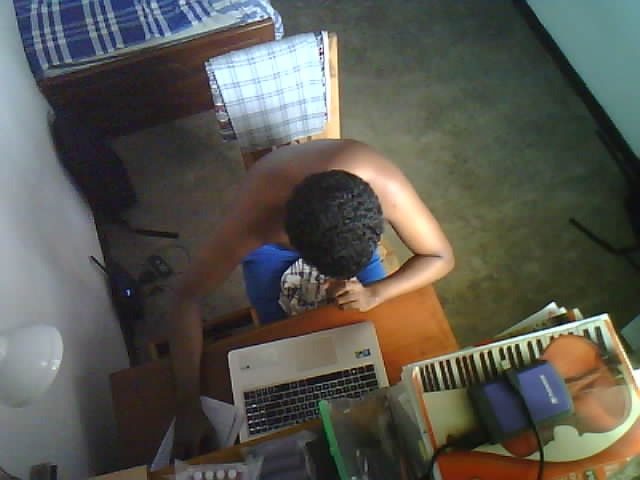

In [ ]:
cv2_imshow(dataset[1000][0])

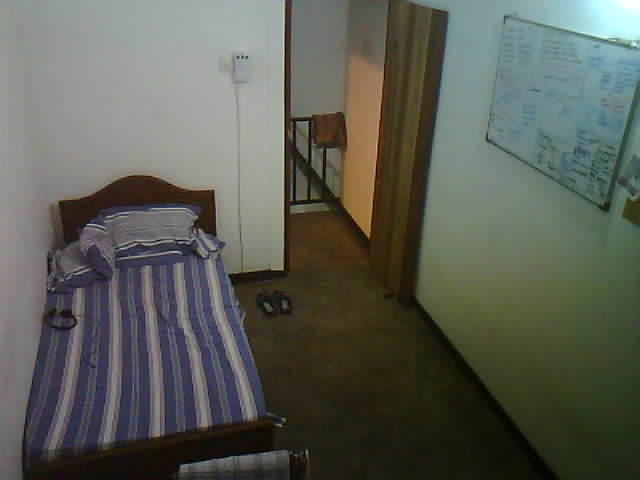

In [ ]:
cv2_imshow(dataset_copy[1000][0])

In [ ]:
print(dataset[290])
print(dataset_copy[290])

In [ ]:
df_train, y_train = split_data_label(t_data)
df_test, y_test = split_data_label(v_data)

In [ ]:
df_train

In [ ]:
print(df_train[0].shape)
img_height = df_train[0].shape[0]
img_width = df_train[0].shape[1]


(480, 640, 3)


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                             tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(96, 3, padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(5)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
df_train[0].shape

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 480, 640, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 240, 320, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 120, 160, 96)      27744     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 60, 80, 96)       

In [ ]:
df_train[0].dtype

In [ ]:
df_train[0].shape

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]

In [ ]:
model.fit(df_train, y_train, epochs=10)

Epoch 1/10
33/33 [==============================] - 6s 170ms/step - loss: 0.6610 - accuracy: 0.7918
Epoch 2/10
33/33 [==============================] - 5s 165ms/step - loss: 0.7340 - accuracy: 0.7243
Epoch 3/10
33/33 [==============================] - 6s 168ms/step - loss: 0.6653 - accuracy: 0.7519
Epoch 4/10
33/33 [==============================] - 6s 168ms/step - loss: 0.7953 - accuracy: 0.7367
Epoch 5/10
33/33 [==============================] - 6s 168ms/step - loss: 0.6989 - accuracy: 0.7177
Epoch 6/10
33/33 [==============================] - 6s 169ms/step - loss: 0.6119 - accuracy: 0.7918
Epoch 7/10
33/33 [==============================] - 5s 166ms/step - loss: 0.5958 - accuracy: 0.7956
Epoch 8/10
33/33 [==============================] - 6s 170ms/step - loss: 0.5823 - accuracy: 0.7956
Epoch 9/10
33/33 [==============================] - 6s 171ms/step - loss: 0.5780 - accuracy: 0.8042
Epoch 10/10
33/33 [==============================] - 6s 170ms/step - loss: 0.5930 - accuracy: 0.7871

In [ ]:
model.evaluate(df_test, y_test)

9/9 [==============================] - 1s 58ms/step - loss: 1.5259 - accuracy: 0.8023


[1.5259242057800293, 0.802281379699707]

In [ ]:
predictions = model.predict(df_test)

4
 vs 
4


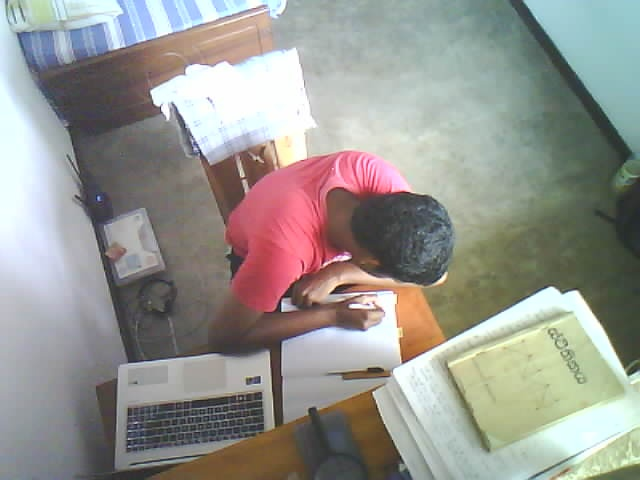

In [ ]:
index = 82
x = np.array([df_test[index]])
model.predict(x, batch_size=1)
print(np.argmax(model.predict(x, batch_size=1)))
print(" vs ")
print(y_test[index])
cv2_imshow(df_test[index])


In [ ]:
y_test.shape

for i in y_test.tolist():
  if int(i)==3:
    print(i)
    break


In [ ]:
index = 20
classes = ['eating','praying','sleeping','studying']
print(classes[int(y_test[index])])
print(classes[np.argmax(predictions[index])])
cv2_imshow(df_test[index]*255)

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
model.save('/content/gdrive/My Drive/dataset/new_recognizerv3_80.h5')